In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [42]:
def inspect_output_at(data_dir):
    assert os.path.exists(data_dir)

    # Plot training loss
    losses = np.load(os.path.join(data_dir, 'losses.npy'))
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training loss')
    plt.show()

    # Print AUROC
    metrics = np.load(os.path.join(data_dir, 'metrics.npy'), allow_pickle=True).item()
    print('AUROC:', metrics['AUROC'])
    # Print TPRs_lowFPR_interp
    print('TPRs_lowFPR_interp:', metrics['TPRs_lowFPR_interp'])
    # Print TPRs_lowFPR
    print('TPRs_lowFPR:', metrics['TPRs_lowFPR'])

    # Plot roc curve
    plt.plot(metrics['fpr'], metrics['tpr'])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

    # Plot histograms of r1 and r2 in scores_split on the same plot
    scores_split = np.load(os.path.join(data_dir, 'scores_split.npz'))
    plt.hist(scores_split['r1'], bins=100, alpha=0.5, label='T NEG', density=True)
    plt.hist(scores_split['r2'], bins=100, alpha=0.5, label='T POS', density=True)
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.title('Histogram of scores')
    plt.legend()
    plt.show()

    # logreg = torch.load(os.path.join(data_dir, 'regression.pt'))


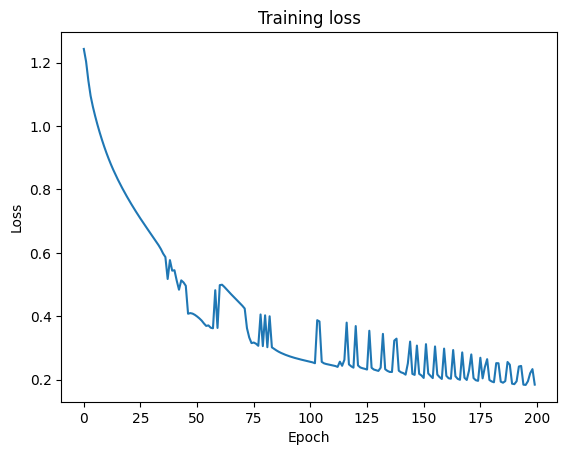

AUROC: 0.9670596153655808
TPRs_lowFPR_interp: [0.94708995 0.61375661 0.22222222 0.07407407]
TPRs_lowFPR: [0.94708995 0.61375661 0.22222222 0.07407407]


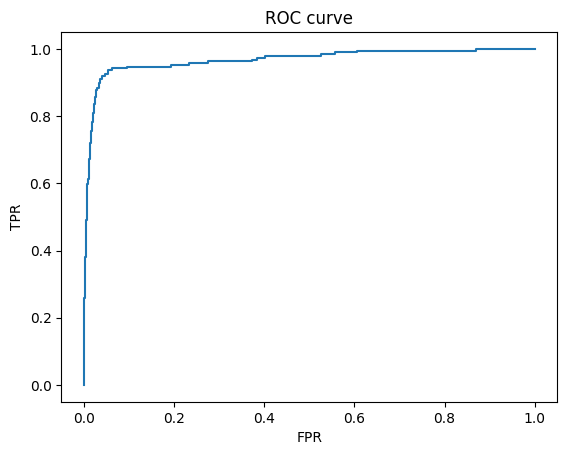

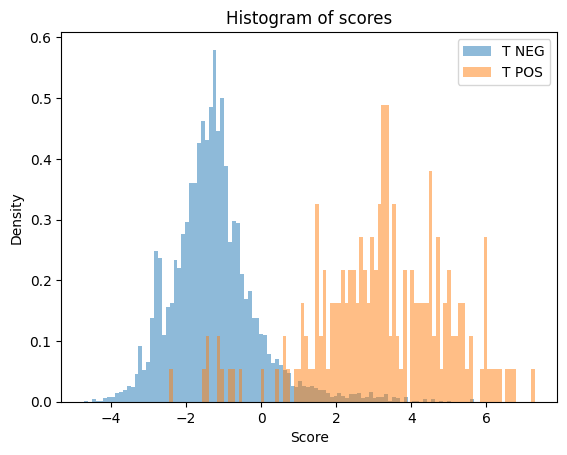

In [45]:
data_dir = "cache/llama-2"
inspect_output_at(data_dir)

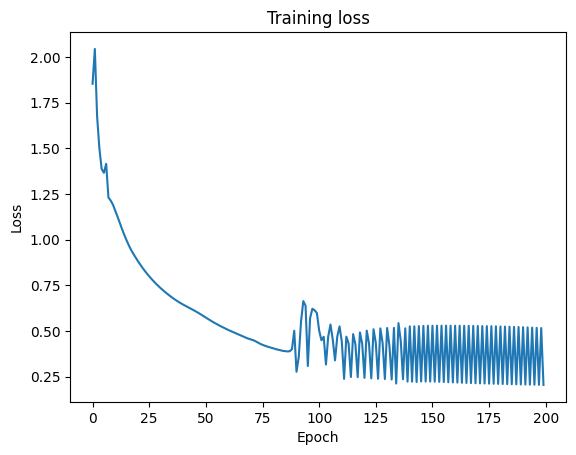

AUROC: 0.9296847968905451
TPRs_lowFPR_interp: [0.76165803 0.47150259 0.20725389 0.09326425]
TPRs_lowFPR: [0.76165803 0.47150259 0.20725389 0.09326425]


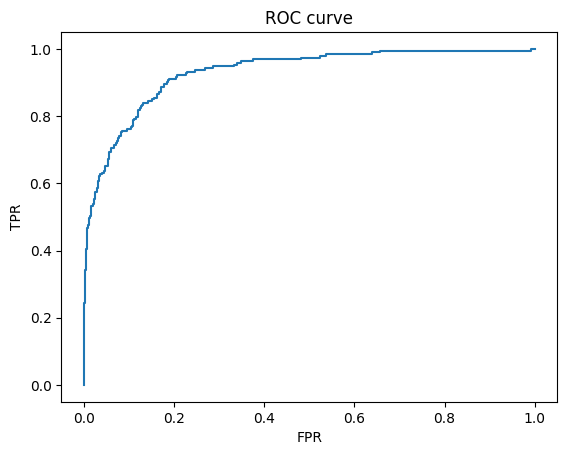

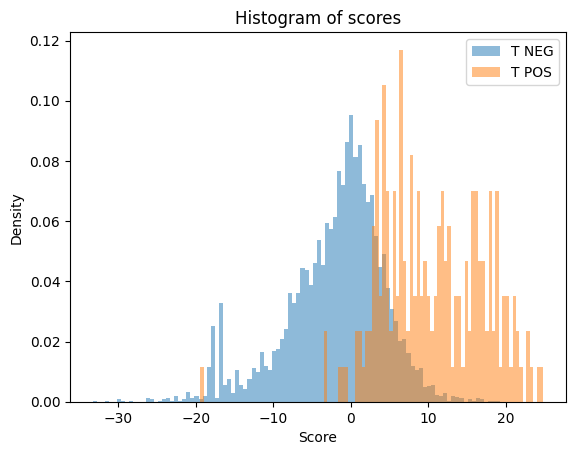

In [46]:
data_dir = "cache/llama-3"
inspect_output_at(data_dir)

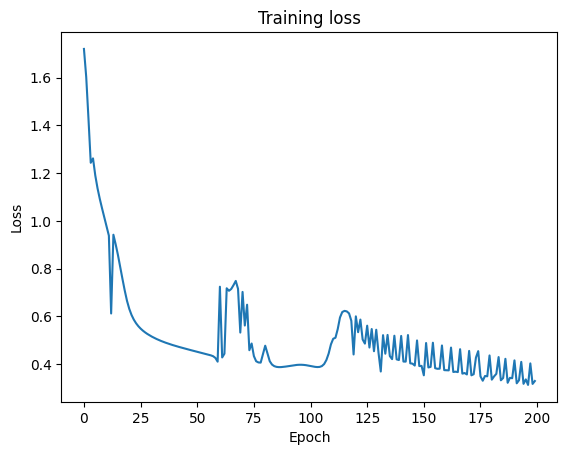

AUROC: 0.9461598752740064
TPRs_lowFPR_interp: [0.87244898 0.36734694 0.10204082 0.01530612]
TPRs_lowFPR: [0.87244898 0.36734694 0.10204082 0.01530612]


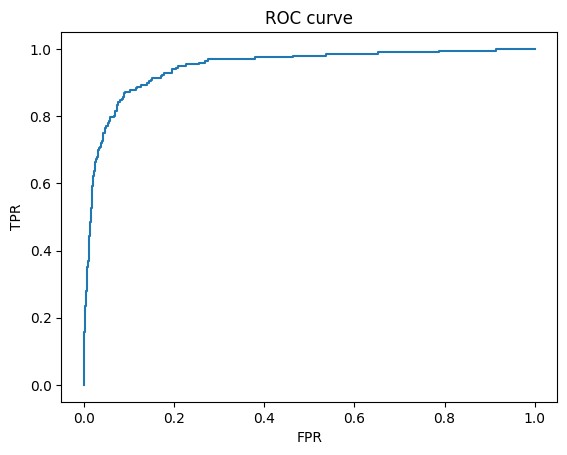

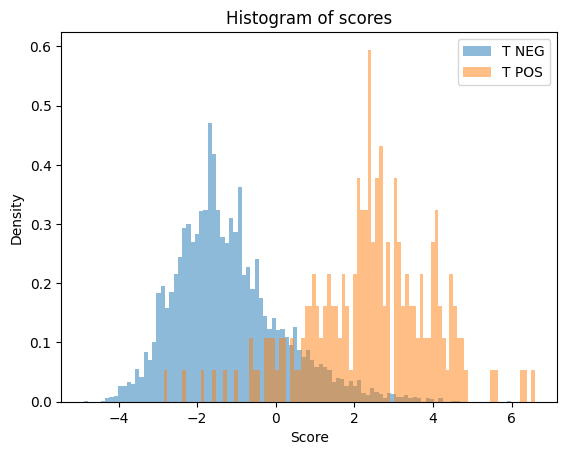

In [47]:
data_dir = "cache/mistral-7b"
inspect_output_at(data_dir)

In [12]:
losses = np.load(os.path.join(data_dir, 'losses.npy'))
metrics = np.load(os.path.join(data_dir, 'metrics.npy'), allow_pickle=True)
logreg = torch.load(os.path.join(data_dir, 'regression.pt'))
scores_split = np.load(os.path.join(data_dir, 'scores_split.npz'))

In [20]:
for k, v in metrics.item().items():
    print(k, v.shape)

AUROC ()
acc_list (375,)
acc_opt ()
thr_opt ()
fpr (375,)
tpr (375,)
thr (375,)
FPRs_4 (4,)
TPRs_lowFPR_interp (4,)
TPRs_lowFPR (4,)
FPR (1001,)
TPR (1001,)


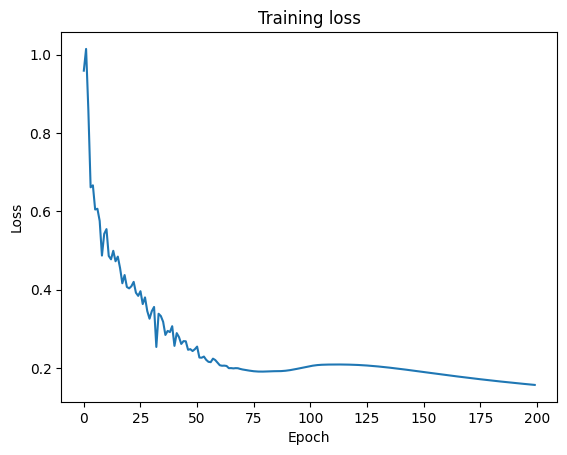

AUROC: 0.9683814936364364
TPRs_lowFPR_interp: [0.92051282 0.67179487 0.31282051 0.08717949]
TPRs_lowFPR: [0.92051282 0.67179487 0.31282051 0.08717949]


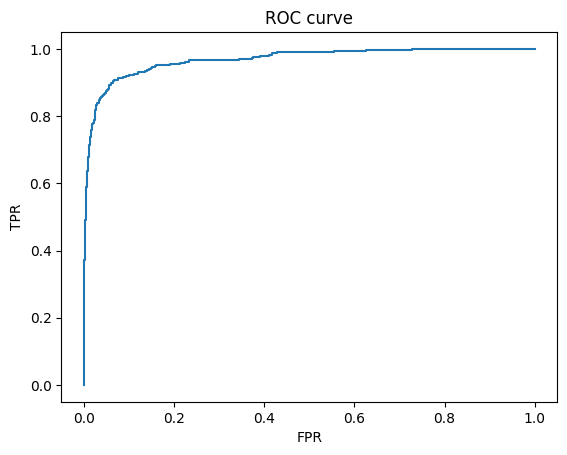

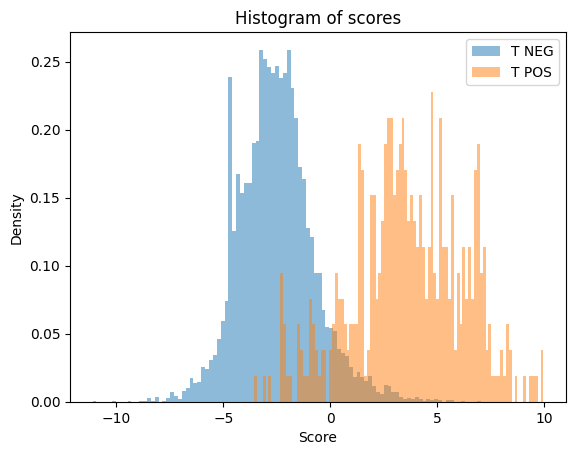

In [61]:
inspect_output_at('cache/llama-3/E200_B32_LR2.0e-04_L1R2.0e-04_TRN10000_TEST10000')

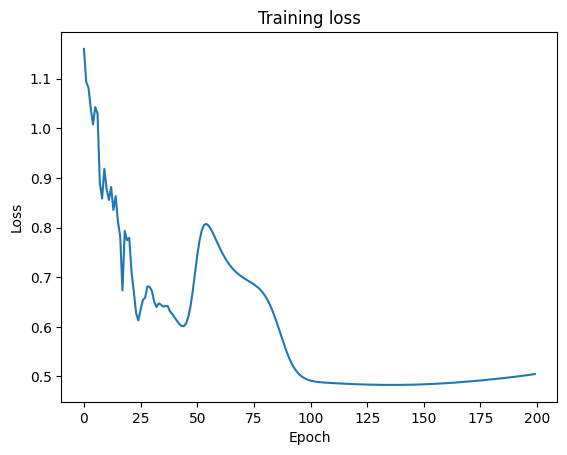

AUROC: 0.9592606803780498
TPRs_lowFPR_interp: [0.90721649 0.54381443 0.21649485 0.06701031]
TPRs_lowFPR: [0.90721649 0.54381443 0.21649485 0.06701031]


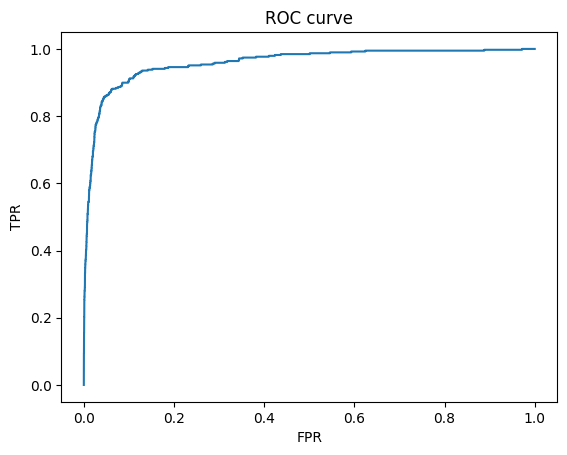

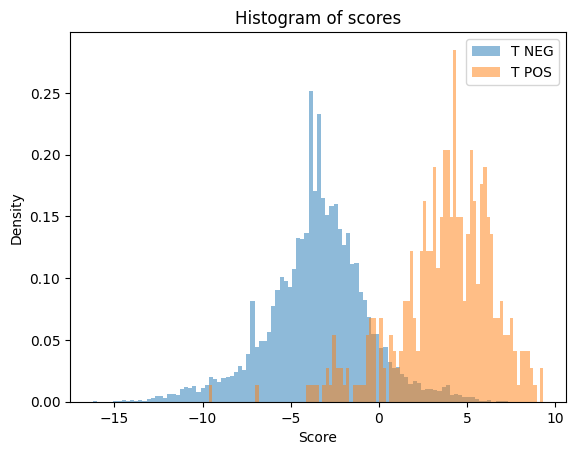

In [62]:
inspect_output_at('cache/mistral-7b/E200_B32_LR5.0e-04_L1R1.0e-03_TRN10000_TEST10000')